In [2]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tools.instruments import instruments

In [5]:
%load_ext autoreload
%aimport tools.instruments
%aimport tools.quotes
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
quote = instruments['AD'].quotes()

In [14]:
df = pd.DataFrame()
df['ma30']= quote.MA(window=30)
df['ma200'] = quote.MA(window=200)

In [16]:
df['diff'] = df['ma30'] - df['ma200']

<AxesSubplot: xlabel='date'>

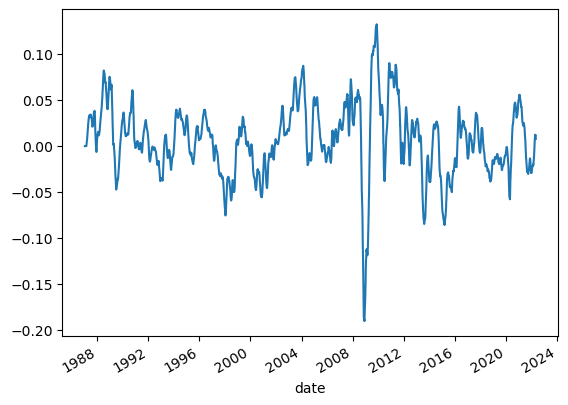

In [17]:
df['diff'].plot()